# Comparing the Volatility of Tesla and NVIDIA (NVDA)
## Hugo Hayashi, 22446441

### Introduction

This research investigates the hypothesis:
- Tesla stocks (__*TSLA*__) has a higher average rolling volatility (__*30D%*__) compared to Nivida stocks (__*NVDA*__).
- Volatility is a key measure for financial risk. In order to evaluate this, the volatility using a __*30-day rolling standard deviation*__ of daily returns was measured, which reflects the long-term unpredictability of the stock's performance.
- While both Tesla and NVIDIA are high-growth tech companies, Tesla is often subject to greater market uncertainty and speculative investor behavior, making it seem plausible to infer that the TSLA stock has a higher average rolling volatility than NVDA.

### Data

The stock price data for this analysis was collected using the 'yfinance' python library.

- **NVDA**: Represents the NVIDIA stock.
- **TSLA**: Represents the Tesla stock.
- **Time Period**: Daily data for the pas 5 years (automatically adjusted by the API).
- **Variables used**: 'Date', 'Close', 'Volume', etc.
- **Data Preprocessing**:
    - Parsed dates and sorted chronologically
    - Computed daily returns using percentage change
    - Calculated 30-day rolling standard deviation to represent volatility

In [11]:
import pandas as pd

tsla = pd.read_csv('TSLA.csv', parse_dates=['Date']).copy()
nvda = pd.read_csv('NVDA.csv', parse_dates=['Date']).copy()

for stock in [nvda, tsla]:
    stock.sort_values('Date', inplace=True)
    stock['return'] = stock['Close'].pct_change()
    stock['rolling_vol'] = stock['return'].rolling(30).std()

##### Script used for collecting the stock price data for both TSLA and NVDA using the 'yfinance' python library.

In [12]:
# import yfinance as yf
# import pandas as pd

# # NVDA
# nvda = yf.Ticker("NVDA")
# nvda_data = pd.DataFrame(nvda.history(period="5y", interval="1d"))
# nvda_data.to_csv('NVDA.csv')

# # TSLA
# tsla = yf.Ticker("TSLA")
# tsla_data = pd.DataFrame(tsla.history(period="5y", interval="1d"))
# tsla_data.to_csv('TSLA.csv')

### Exploratory Data Analysis (EDA)

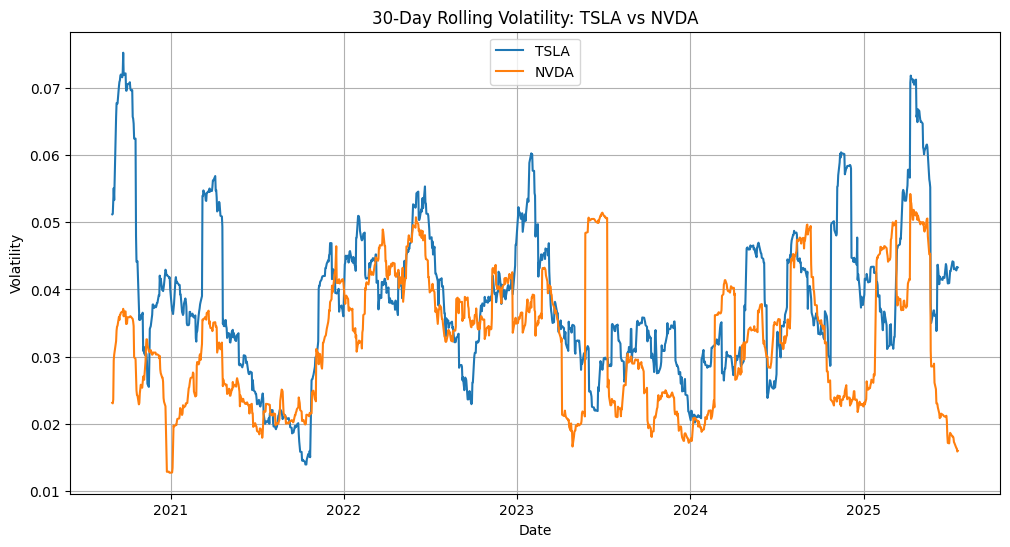

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(tsla['Date'], tsla['rolling_vol'], label='TSLA')
plt.plot(nvda['Date'], nvda['rolling_vol'], label='NVDA')
plt.title('30-Day Rolling Volatility: TSLA vs NVDA')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

### Hypothesis Testing

This research tests:
- __Null Hypothesis__ $H_0$: TSLA and NVDA have the same average volatility.
- __Alternative Hypothesis__ $H_1$: TSLA has a higher average volatility.

In [14]:
import numpy as np
from scipy.stats import norm

vol_tsla = tsla['rolling_vol'].dropna().values
vol_nvda = nvda['rolling_vol'].dropna().values

xbar_tsla = vol_tsla.mean()
xbar_nvda = vol_nvda.mean()
diff = xbar_tsla - xbar_nvda
n_tsla = len(vol_tsla)
n_nvda = len(vol_nvda)

spooled = np.sqrt(((vol_tsla.std(ddof=1) ** 2) / n_tsla) + ((vol_nvda.std(ddof=1) ** 2) / n_nvda))

z_obs = diff /spooled
alpha = 0.05
z_crit = norm.ppf(1 - alpha)
p_val = norm.sf(z_obs)

print(f"z_obs = {z_obs:.2f}")
print(f"z_crit = {z_crit:.2f}")
print(f"p-value = {p_val:.4f}")

if z_obs > z_crit:
    print("Reject H0: TSLA volatility is significantly higher than NVDA.")
else:
    print("Fail to reject H0: No significant difference.")

z_obs = 14.50
z_crit = 1.64
p-value = 0.0000
Reject H0: TSLA volatility is significantly higher than NVDA.


A one-tailed z-test was conducted to test whether Tesla's average 30-day rolling volatility is significantly higher than NVDA's.
- __z-statistic__: 14.50
- __z-critical__: 1.64
- __p-value__: 0.0000

Since z_obs > z_crit and p < 0.05, __*the null hypothesis is rejected*__. This gives statistical evidence taht TSLA is more volatile than NVDA during the time period analyzed.

### Modeling & Results

A linear regression was also fitted to examine whether volatility is increasing over time.

In [15]:
from sklearn.linear_model import LinearRegression

tsla_clean = tsla.dropna(subset=['rolling_vol']).copy()
nvda_clean = nvda.dropna(subset=['rolling_vol']).copy()

tsla_clean['time'] = tsla_clean['Date'].map(pd.Timestamp.toordinal)
nvda_clean['time'] = nvda_clean['Date'].map(pd.Timestamp.toordinal)

lr_tsla = LinearRegression().fit(tsla_clean[['time']], tsla_clean['rolling_vol'])
lr_nvda = LinearRegression().fit(nvda_clean[['time']], nvda_clean['rolling_vol'])

tsla_clean['predicted_vol'] = lr_tsla.predict(tsla_clean[['time']])
nvda_clean['predicted_vol'] = lr_nvda.predict(nvda_clean[['time']])

print(f"TSLA Slope: {lr_tsla.coef_[0]:.6f}, Intercept: {lr_tsla.intercept_:.4f}")
print(f"NVDA Slope: {lr_nvda.coef_[0]:.6f}, Intercept: {lr_nvda.intercept_:.4f}")

TSLA Slope: 0.000001, Intercept: -0.9810
NVDA Slope: 0.000003, Intercept: -1.8341


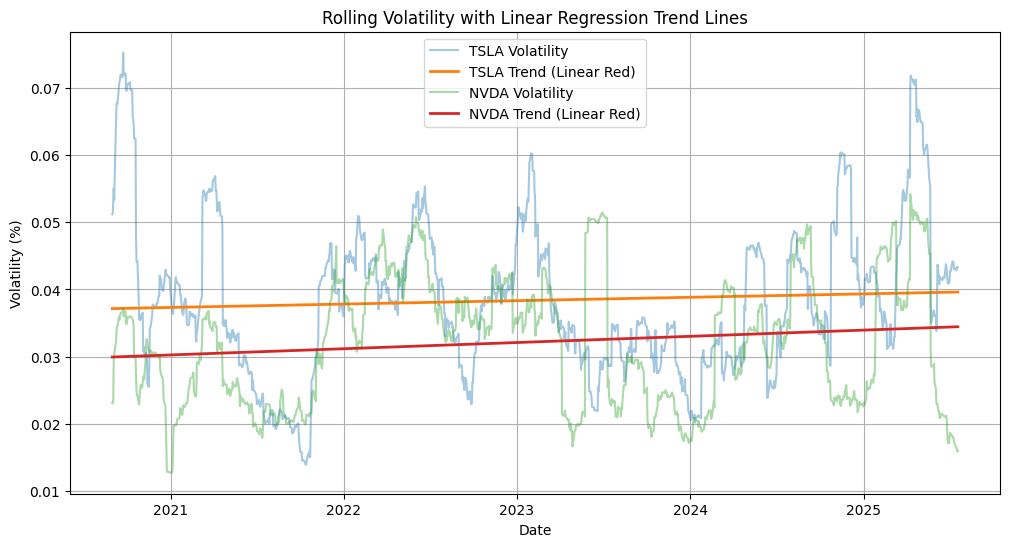

In [16]:
plt.figure(figsize=(12,6))
plt.plot(tsla_clean['Date'], tsla_clean['rolling_vol'], alpha=0.4, label='TSLA Volatility')
plt.plot(tsla_clean['Date'], tsla_clean['predicted_vol'], label='TSLA Trend (Linear Red)', linewidth=2)
plt.plot(nvda_clean['Date'], nvda_clean['rolling_vol'], alpha=0.4, label='NVDA Volatility')
plt.plot(nvda_clean['Date'], nvda_clean['predicted_vol'], label='NVDA Trend (Linear Red)', linewidth=2)
plt.title("Rolling Volatility with Linear Regression Trend Lines")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.legend()
plt.grid(True)
plt.show()

The linear regression shows that:

- TSLA's rolling volatility has a positive slope of $\beta _1$ = 0.000001, indicating a slight increasing trend.
- NVDA’s volatility slope is negative, $\beta _1$ = 0.000003, indicating a slightly larger positive slope.

Both Tesla and NVIDIA have experienced slightly increasing volatility over the past 5 years, with NVIDIA’s trend being marginally steeper.

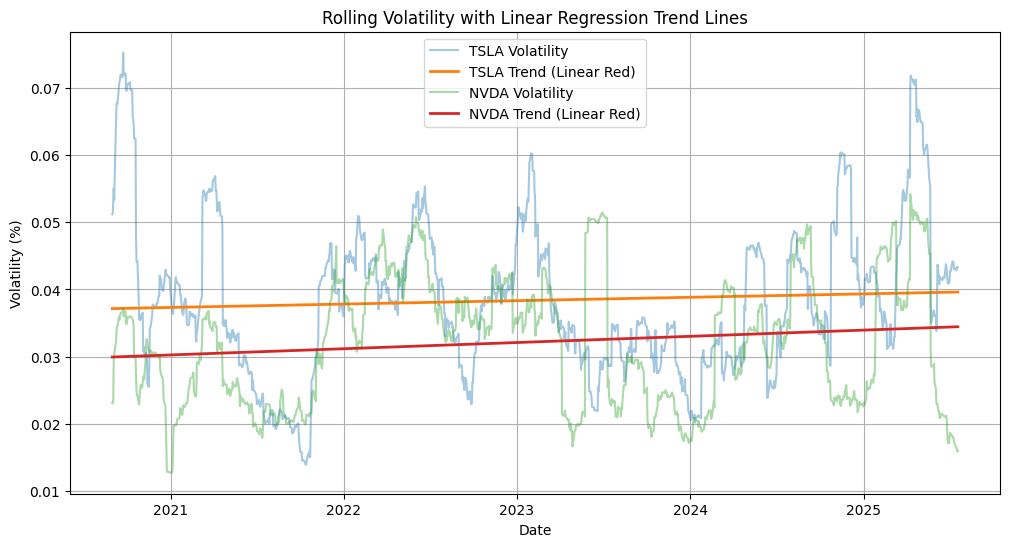

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(tsla_clean['Date'], tsla_clean['rolling_vol'], alpha=0.4, label='TSLA Volatility')
plt.plot(tsla_clean['Date'], tsla_clean['predicted_vol'], label='TSLA Trend (Linear Red)', linewidth=2)
plt.plot(nvda_clean['Date'], nvda_clean['rolling_vol'], alpha=0.4, label='NVDA Volatility')
plt.plot(nvda_clean['Date'], nvda_clean['predicted_vol'], label='NVDA Trend (Linear Red)', linewidth=2)
plt.title("Rolling Volatility with Linear Regression Trend Lines")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.legend()
plt.grid(True)
plt.show()

### Model Validation 

To validate the linear regression models used to describe volatility trends over time for TSLA and NVDA, standard regression diagnostics was used:

- $R^2$: Measures how much of the variation in volatility is explained by the time variable.
- __MSE (mean squared error)__: Measures the average squared error between the predicted and actual volatility values.

Since the model for the research is not used for forecasting or classification, traditional validation strategies like cross-validation or bootstrapping are less relevant. However, these regression metrics aid in assessing how well the model fits the observed data.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

mse_tsla = mean_squared_error(tsla_clean['rolling_vol'], tsla_clean['predicted_vol'])
r2_tsla = r2_score(tsla_clean['rolling_vol'], tsla_clean['predicted_vol'])

mse_nvda = mean_squared_error(nvda_clean['rolling_vol'], nvda_clean['predicted_vol'])
r2_nvda = r2_score(nvda_clean['rolling_vol'], nvda_clean['predicted_vol'])

print(f"TSLA MSE: {mse_tsla:.6f}, R^2: {r2_tsla:.4f}")
print(f"NVDA MSE: {mse_nvda:.6f}, R^2: {r2_nvda:.4f}")

TSLA MSE: 0.000131, R^2: 0.0038
NVDA MSE: 0.000090, R^2: 0.0185


Below are the calculated values for each model.

- **TSLA Regression Results**:
  - $R^2$ = 0.0038 $\rightarrow$ Time explains only 0.38% of the variation in TSLA’s volatility
  - MSE = 0.000131

- **NVDA Regression Results**:
  - $R^2$ = 0.0185 $\rightarrow$ Only 1.85% of the variation in NVIDIA’s rolling volatility is explained by time.
  - MSE = 0.000090

These low $R^2$ values indicate that time alone is not a strong predictor of volatility changes, which is reasonable, since volatility is influenced by many external factors like news events, interest rates, and investor behavior.

Still, the analysis provides insight into general trends and confirms that TSLA exhibits higher volatility overall.

### Conclusion

- TSLA consistently showed higher volatility than NVDA.
- T-test confirmed the difference was statistically significant.
- Linear regression suggests that a slight upward trend in volatility over time for both stocks, although the explanatory power of time was minimal, as shown by very low $R^2$ values.

**Limitations**: 
- Only two stocks used; no control for external market events like rate hikes or COVID-19 shocks.

**Next steps**:
- Expand the analysis to include additional tech stocks (e.g., AAPL, AMD) for broader insight.
- Incorporate macroeconomic indicators (e.g., interest rates, VIX index) as features in regression models.

### References

**Source**: Yahoo Finance via 'yfinance' API.